In [6]:
### qqq

In [1]:
import time
import os
import numpy as np
import sys
import pandas as pd
import glob
import matplotlib.pyplot as plt
import cv2
import ast
import stumpy
from stumpy import config
import numpy as np
import numpy.testing as npt
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

In [2]:
config.STUMPY_EXCL_ZONE_DENOM = 1  # i ± int(np.ceil(m / {1}))
plt.rcParams['font.size'] = 10
plt.rcParams["font.family"] = "Times New Roman"
plt.style.use('https://raw.githubusercontent.com/TDAmeritrade/stumpy/main/docs/stumpy.mplstyle')

In [3]:
# -------------

In [4]:
# Scan Folder and Find
def list_scan_from_path (baseDir, file_name):
    MAIN_VD_FEATURES_LX = []
    # Scan the Folder and Save the list[]
    FOLDER_CSV_SCAN = glob.iglob( baseDir + os.sep + '**' + os.sep + '*.CSV', recursive=True )
    # Order By Name
    #FOLDER_CSV_SCAN = sorted(FOLDER_CSV_SCAN)
    # Interate frame by frame
    for filename in FOLDER_CSV_SCAN:
        if (filename.find(file_name) != -1) == True:
            #print (filename)
            MAIN_VD_FEATURES_LX.append(filename)
        #
    # Return the list
    return MAIN_VD_FEATURES_LX
#<

In [5]:
# Collect the base
def collect_current_path (original_path):
    xpath = original_path.split(os.sep)
    new_path = ''
    ii=0
    for parts in xpath:
        if ii <= len(xpath)-2:
            new_path += parts + str(os.sep)
        ii += 1
    # Return
    return new_path
#<chg

In [6]:
# Collect the base
def collect_basex (original_path):
    xpath = original_path.split(os.sep)
    new_path = ''
    ii=0
    for parts in xpath:
        if ii <= len(xpath)-2:
            new_path += parts + str(os.sep)
        ii += 1
    # Return
    return new_path
#<chg

In [7]:
def plot(dt, setence, name_to_save = None, save_fig=True):
    plt.subplots(figsize=(10, 3))
    plt.suptitle(f'{setence}')
    plt.xlabel('Frame')
    plt.ylabel('Amplitude')
    plt.plot(dt, label=dt.columns)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    if save_fig:
        plt.savefig(f'{name_to_save}.png')
    plt.show()

In [8]:
def check_file_exist(local_path, file_name):
    base_path = collect_basex(local_path)
    #print(base_path)
    path_test = os.path.join(base_path, file_name)
    if os.path.exists(path_test):
        return True, path_test
    else: return False, path_test

In [9]:
# Functions
# Class to manager the searches
class Comparing:
    def __init__(self, Q_df, T_df):
        self.Q_df = Q_df # referencia
        self.T_df = T_df # serie
        self.matches_idxs = [] # index das subséries mais próximas da referencia encontradas pela função match
        self.filter_matches_idxs = [] # index selecionados por similaridade entre várias medidas
        self.measure_name = None # nome da medida

    def calc_matches(self):
        self.matches_idxs = stumpy.match(self.Q_df, self.T_df, max_distance=lambda D: max(np.mean(D) - 2.0 * np.std(D), np.min(D)))

# Function to select the index presents in all reference measures
# The treshold demilited the distance tolerance between indexes
def find_close_values(idxs, threshold):
    close_values = []

    # Comparação entre cada par de listas
    for i in range(len(idxs)):
        for j in range(i+1, len(idxs)):
            list1 = idxs[i]
            list2 = idxs[j]

            # Comparação de cada elemento entre as duas listas
            for num1 in list1:
                for num2 in list2:
                    # Se a diferença entre os valores for menor ou igual ao threshold, considere-os próximos
                    if abs(num1 - num2) <= threshold:
                        close_values.append(min(num1,num2))
                        
    close_values = set(close_values)
    return close_values

def find_all_matches(list_of_index, threshold):
    n = len(list_of_index)
    list_aux = []
    if n <= 1:  
        return list_of_index
    else: 
        #seleciona o primeiro e segundo elemento da lista para a busca de similaridade
        list_aux.append(list_of_index.pop(0))
        list_aux.append(list_of_index.pop(0))
        result = find_close_values(list_aux, threshold)
        list_of_index.insert(0, result)
        return find_all_matches(list_of_index, threshold)

In [10]:
# ---------------

In [11]:
# Variables
# Base Dir ../Dataset
baseDir = os.path.join('..', 'Dataset')

In [12]:
#
## Seach pacth of MEASURE files
MAIN_LIST_MEASURE = []

In [13]:
# File_name to find
MEASURE_FILE_PATH = 'VD_WORDS_OCCURRENCE.CSV'

########## - Find only in DD-Local and - YT
# Break 1 - Exclude the Folder of References
# Variables
# B1.1 - Collect in DD-Local
#baseDir_local = os.path.join(baseDir, 'DD-Local')
# Call the basic function
#MAIN_LIST_MEASURE_local = list_scan_from_path (baseDir_local, MEASURE_FILE_PATH)
MAIN_LIST_MEASURE_local = []
# Variables
# B1.2 - Collect in YT
baseDir_yt = os.path.join(baseDir, 'YT-Online')
# Call the basic function
MAIN_LIST_MEASURE_yt = list_scan_from_path (baseDir_yt, MEASURE_FILE_PATH)

# Join the Two Lists
MAIN_LIST_MEASURE = MAIN_LIST_MEASURE_local + MAIN_LIST_MEASURE_yt

In [14]:
#MAIN_LIST_MEASURE

In [15]:
SUB_FILE_NAME = 'VD_SUBTITLES.CSV'
MAIN_LIST_MEASURE_FILTER = []
for current_path in MAIN_LIST_MEASURE:
    path = collect_basex(current_path)
    check, _ = check_file_exist(path, SUB_FILE_NAME)
    if check:
        MAIN_LIST_MEASURE_FILTER.append(current_path)  

In [16]:
MAIN_LIST_MEASURE_FILTER

['..\\Dataset\\YT-Online\\VD_Y_0000000001\\VD_WORDS_OCCURRENCE.CSV',
 '..\\Dataset\\YT-Online\\VD_Y_0000000002\\VD_WORDS_OCCURRENCE.CSV',
 '..\\Dataset\\YT-Online\\VD_Y_0000000003\\VD_WORDS_OCCURRENCE.CSV',
 '..\\Dataset\\YT-Online\\VD_Y_0000000004\\VD_WORDS_OCCURRENCE.CSV',
 '..\\Dataset\\YT-Online\\VD_Y_0000000005\\VD_WORDS_OCCURRENCE.CSV',
 '..\\Dataset\\YT-Online\\VD_Y_0000000006\\VD_WORDS_OCCURRENCE.CSV',
 '..\\Dataset\\YT-Online\\VD_Y_0000000007\\VD_WORDS_OCCURRENCE.CSV',
 '..\\Dataset\\YT-Online\\VD_Y_0000000008\\VD_WORDS_OCCURRENCE.CSV',
 '..\\Dataset\\YT-Online\\VD_Y_0000000009\\VD_WORDS_OCCURRENCE.CSV',
 '..\\Dataset\\YT-Online\\VD_Y_0000000011\\VD_WORDS_OCCURRENCE.CSV',
 '..\\Dataset\\YT-Online\\VD_Y_0000000012\\VD_WORDS_OCCURRENCE.CSV',
 '..\\Dataset\\YT-Online\\VD_Y_0000000013\\VD_WORDS_OCCURRENCE.CSV',
 '..\\Dataset\\YT-Online\\VD_Y_0000000014\\VD_WORDS_OCCURRENCE.CSV',
 '..\\Dataset\\YT-Online\\VD_Y_0000000015\\VD_WORDS_OCCURRENCE.CSV',
 '..\\Dataset\\YT-Online\\VD_Y_000

## Reading all Word Occurrence files

In [17]:
# Select the time-serie
VD_INFO_DT = 'VD_INFO.CSV'
TOTAL = pd.DataFrame()
for current_path in MAIN_LIST_MEASURE_FILTER:
    path_dir = collect_current_path(current_path)
    vd_info_path = os.path.join(path_dir, VD_INFO_DT)
    
    vd_info = pd.read_csv(vd_info_path)
    vd_info.drop(columns=['Unnamed: 0'], inplace=True)
    video_id =  vd_info.video_id[0]
    
    try:
        VD_WORDS_OCCURRENCE = pd.read_csv(current_path)
        if 'Unnamed: 0' in VD_WORDS_OCCURRENCE.columns:
            VD_WORDS_OCCURRENCE.drop(columns=['Unnamed: 0'], inplace=True)
            
        VD_WORDS_OCCURRENCE.insert(0, 'video_id', video_id)
        #VD_WORDS_OCCURRENCE['video_id'] = video_id
        TOTAL = pd.concat([TOTAL, VD_WORDS_OCCURRENCE])
        if VD_WORDS_OCCURRENCE.empty:
            print("O arquivo CSV está vazio.", current_path)
    except pd.errors.EmptyDataError:
        print("O arquivo CSV está vazio.", current_path)       

O arquivo CSV está vazio. ..\Dataset\YT-Online\VD_Y_0000000001\VD_WORDS_OCCURRENCE.CSV
O arquivo CSV está vazio. ..\Dataset\YT-Online\VD_Y_0000000003\VD_WORDS_OCCURRENCE.CSV
O arquivo CSV está vazio. ..\Dataset\YT-Online\VD_Y_0000000012\VD_WORDS_OCCURRENCE.CSV
O arquivo CSV está vazio. ..\Dataset\YT-Online\VD_Y_0000000017\VD_WORDS_OCCURRENCE.CSV
O arquivo CSV está vazio. ..\Dataset\YT-Online\VD_Y_0000000018\VD_WORDS_OCCURRENCE.CSV
O arquivo CSV está vazio. ..\Dataset\YT-Online\VD_Y_0000000022\VD_WORDS_OCCURRENCE.CSV


## Setting word to carry out the search flow

In [18]:
# TYPE WORD IN CAPS LOCK
word ='PRESENTATION'
FILTER = TOTAL[TOTAL['selected_word'] == word]
print(f'The Word "{word}" has {len(FILTER)} occurrence')

The Word "PRESENTATION" has 17 occurrence


In [19]:
# Count word frequency in each video

In [20]:
count_id = FILTER.video_id.value_counts()
FREQUENCY_DT = pd.DataFrame({'video_id': count_id.index, 'amount': count_id.values})

In [21]:
FREQUENCY_DT

,video_id,amount
0,37,6
1,11,5
2,31,4
3,6,1
4,8,1


In [22]:
# setting video_id to show the setences in subtitle
video_id = 11
FILTER_ID = FILTER.query(f'video_id=={video_id}')
FILTER_ID = FILTER_ID.rename_axis('id_sentence')
FILTER_ID 

,video_id,selected_word,start_time_seconds,end_time_seconds,ini_frame,end_frame,text
id_sentence,,,,,,,
0,11,PRESENTATION,3.179,7.410,76,178,PRESENTATION AND I TALKED ABOUT THE
1,11,PRESENTATION,22.800,26.580,546,638,PRESENTATION SKILLS I'LL TEACH YOU HOW
2,11,PRESENTATION,122.040,125.729,2926,3015,GIVING THE PRESENTATION OF WHY I'M
3,11,PRESENTATION,162.500,167.060,3896,4006,SECTIONS OF THAT PRESENTATION TO GIVE
4,11,PRESENTATION,191.060,195.769,4580,4694,YOUR PRESENTATION IS LESS THAN 60


## Plotting all all sequences of the selected word

In [32]:
# Type the setence index
id_sentence = list(FILTER_ID.index)
id_sentence

[0, 1, 2, 3, 4]

In [70]:
##
# READ VD BLOCKS_WORDS
# generate the path of the video in dataset
VD_BLOCKS_FILE_NAME = 'VD_BLOCKS_WORDS_OCCURRENCE.CSV'
path_video = os.path.join(baseDir_yt, f'VD_Y_{video_id:010d}', VD_BLOCKS_FILE_NAME)
VD_BLOCKS_WORDS = pd.read_csv(path_video)
VD_BLOCKS_WORDS = VD_BLOCKS_WORDS.rename(columns={'Unnamed: 2': 'frame'})

início e fim de cada apresentation nas frases:
0 - 548:568
1 - 77:97
2 - 2936:2955
3 - 3912:3930
4 - 4583:4599

In [76]:
frames_word = {'0': [77,97],
            '1':[548,568],
            '2': [2936,2955],
            '3': [3912,3930],
            '4': [4583,4599]}

ALL_WORD_DT = pd.DataFrame()

for id in id_sentence:
    VD_BLOCKS_WORDS_FILTER = VD_BLOCKS_WORDS.query(f'block_id=={id}').reset_index(drop=True)

    # Check if there is a discontinuity in the sentence
    if VD_BLOCKS_WORDS_FILTER.loc[1:,'gap'].any()==1:
        print(f'A time series exhibits a discontinuity: {id}')
    else:
        SENTENCE_DT = VD_BLOCKS_WORDS_FILTER.iloc[:,[0]+[2]+[4] + list(range(7, 23))]
        #SENTENCE_DT = SENTENCE_DT.set_index(pd.Index(SENTENCE_DT['frame_seq']))
        #SENTENCE_DT.drop(columns=["frame_seq"], inplace=True)
        
        #corta palavra
        frame_begin, frame_end = frames_word[str(id)]
        WORD_DT = SENTENCE_DT.query(f'frame >= {frame_begin} & frame <= {frame_end}')
        ALL_WORD_DT = pd.concat([ALL_WORD_DT, WORD_DT])

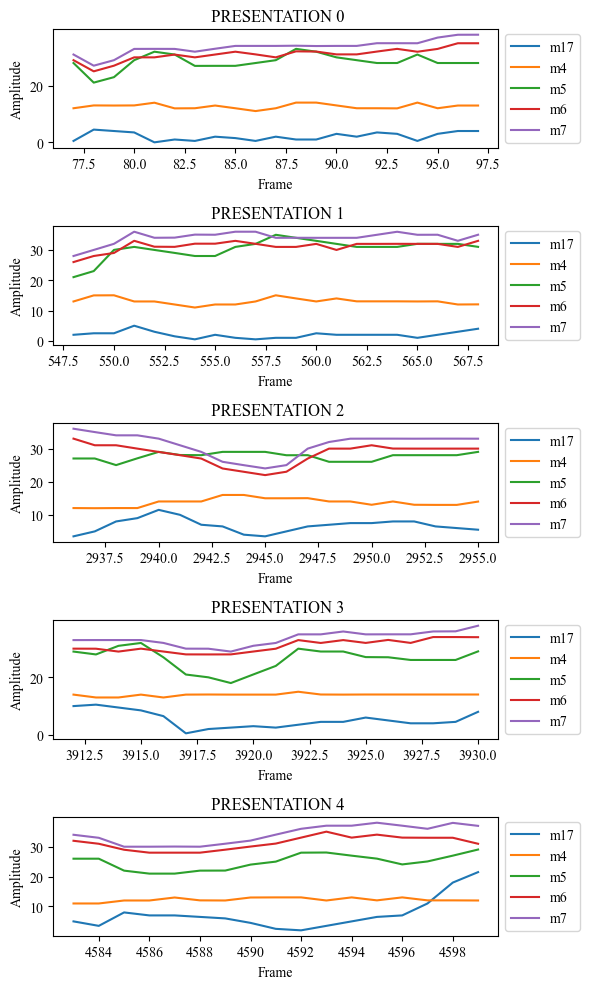

In [112]:
#plot graph
reference_measures = ['m17', 'm4', 'm5', 'm6', 'm7']

fig, axs = plt.subplots(len(id_sentence), 1, figsize=(6, 10))
for i, id in enumerate(id_sentence):
    dt = ALL_WORD_DT.query(f'block_id=={id}').reset_index(drop=True)
    y = dt.frame.values
    dt = dt[reference_measures]
    axs[i].set_xlabel('Frame')
    axs[i].set_ylabel('Amplitude')
    axs[i].plot(y, dt, label=dt.columns)
    axs[i].legend(loc='center left', bbox_to_anchor=(1, 0.5))
    axs[i].set_title(f' {word} {i}')
    
plt.tight_layout()
plt.savefig(f'presentation.png')
plt.show()

In [113]:
#end